<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework5_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 OPTI 556

## Joel Berkson 11/14/2021

So we are given the following *coherent* impulse response of some system. We know that the incoherent response is the magnitude squared of this function:

$$
h_{incoherent}(x,y,z) = |h(x,y,z)|^2=|\frac{1}{w_o^2+i\lambda z}e^{2\phi i\frac{z}{\lambda}}e^{-\pi\frac{x^2+y^2}{w_o^2+i\lambda z}}|^2
$$

When I think of the resolution of an optical system, I always think of MTF. When I think of ways to test MTF, I always think of the knife edge test. This is done by creating a step function edge image. The derivative of a step function is a delta function, so propagating a knife edge through the system produces an edge spread function (ESF) and the derivative creates a line spread function (LSF). Doing this in X and Y and multiplexing gives a measured PSF. 

$$
LSF = \frac{\delta}{\delta x} (ESF(x))
$$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io

Incoherent transfer function

In [3]:
def g(rho,z, wo):
  # all spatial terms are in units of wavelengths
  g=(1/(wo**2+1j*z))*np.exp(2*np.pi*1j*z)*np.exp(-np.pi*rho**2/(wo**2+1j*z))
  return np.abs(g)**2

8.853127467300747e-09


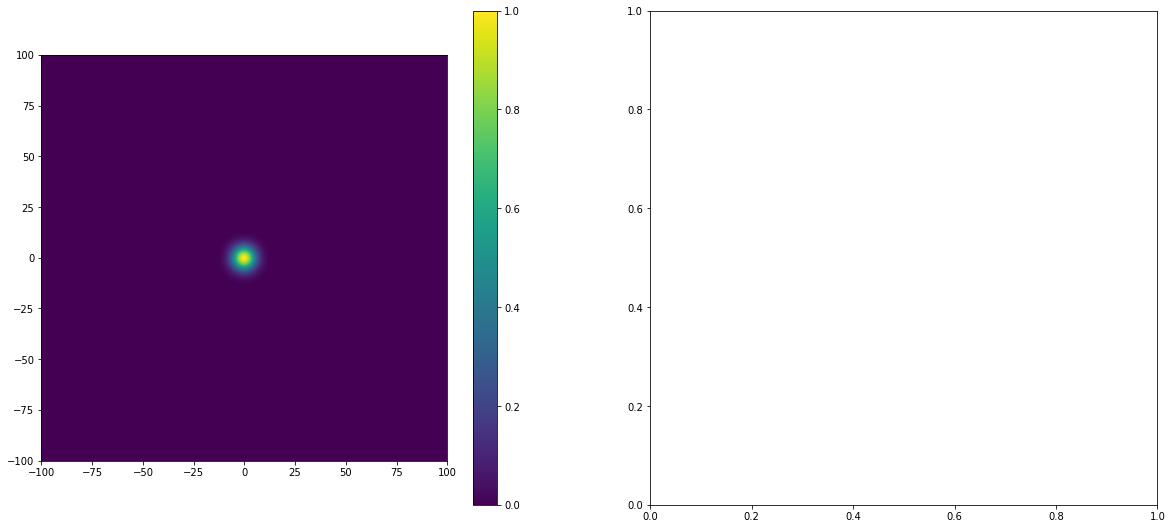

In [4]:
photons = 10000
x=np.linspace(-100,100,1024)
xx,yy= np.meshgrid(x,x)
X = np.abs(g(np.sqrt(xx**2+yy**2), 100, 5))**2
Xnorm = X/np.max(X)
print(np.max(X))
Xphotnoise = np.sqrt(np.random.poisson(np.power(Xnorm*np.sqrt(photons),2)))/np.sqrt(photons)
Xphotnoise[Xphotnoise>1] = 1
Xphotnoise[Xphotnoise<0] *= 0
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(Xphotnoise,extent=[-100,100,-100,100])
plt.colorbar()
plt.subplot(2,2,2)


In [5]:
def edge(X):
  if X > 0:
      f = 1
  else:
      f = -1
  return f

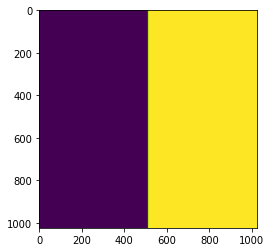

In [104]:
X = np.linspace(-100,100,1024)
X,Y= np.meshgrid(X,X)
rho = np.sqrt(X**2+Y**2)

edgefun = np.vectorize(edge)
KnifeEdge = edgefun(X)
plt.imshow(KnifeEdge)

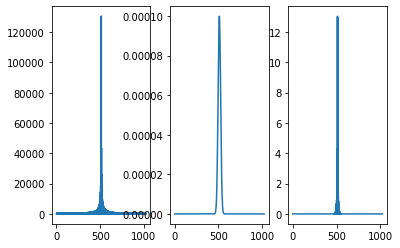

In [177]:
xx = np.linspace(-100,100,1024)
xx,yy= np.meshgrid(xx,xx)
rho_trans = np.sqrt(xx**2+yy**2)
h_incoh = g(rho_trans,1,10)
h_incoh = h_incoh


H_incoh = np.fft.fftshift(np.fft.fft2((h_incoh)))
dx = xx[1,2]-xx[1,1]

plt.subplot(1,3,1)
KnifeEdge_fft = (np.fft.fft2((KnifeEdge)))*dx
plt.plot(np.abs(np.fft.fftshift(KnifeEdge_fft)[512,:]))
plt.subplot(1,3,2)
plt.plot(np.abs(h_incoh[512,:]))
plt.subplot(1,3,3)
Multiplied = np.abs(h_incoh)*np.abs((np.fft.fftshift(KnifeEdge_fft)))
plt.plot(np.abs(Multiplied[512,:]))

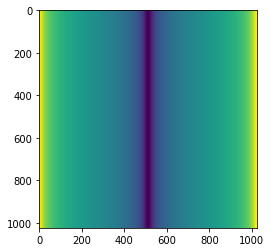

In [172]:
Image = np.fft.ifft2(np.fft.fftshift(Multiplied))/dx**2
plt.imshow(np.real(Image))


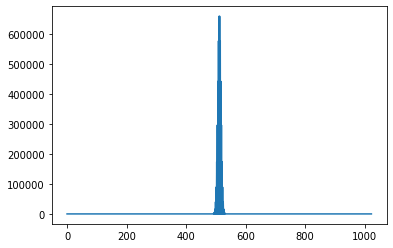

In [84]:
mult = np.fft.fftshift(np.real(H_incoh)*KnifeEdge_fft)
plt.plot(np.real(mult[512,:]))

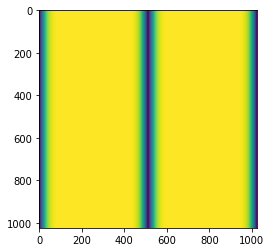

In [86]:
Image = (np.fft.ifft2(np.fft.fftshift(np.real(H_incoh)*(KnifeEdge_fft))))
plt.imshow(np.abs(Image))